In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xarray as xr

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

Read sample plots data for Finland

In [4]:
df = pd.read_csv('v_finland_plots_targets.csv')

In [5]:
df.head()

,plot_id,lon,lat,num_pine,vol_pine,num_spruce,vol_spruce,num_deciduous,vol_deciduous,number,volume,diameter,height,age,ratio_pine,ratio_spruce,ratio_deciduous,dominant_species
0,509711,23.760515,61.857391,629,239.3,79,27.6,118,11.3,825,278.2,22.5,19.6,40,0.86017,0.09921,0.04062,pine
1,509712,23.776417,61.857257,668,129.7,118,16.5,393,28.6,1179,174.9,17.8,15.7,35,0.74157,0.09434,0.16352,pine
2,509713,23.762006,61.854816,865,194.8,0,0.0,39,0.2,904,195.0,20.0,15.7,35,0.99897,0.00000,0.00103,pine
3,509714,23.761818,61.852331,2358,130.1,236,4.4,472,6.4,3065,140.9,12.4,12.0,30,0.92335,0.03123,0.04542,pine
4,509715,23.762492,61.850755,200,105.7,320,127.4,20,0.4,540,233.6,26.6,20.5,62,0.45248,0.54538,0.00171,none


In [6]:
llat = df.lat.min()
ulat = df.lat.max()
llon = df.lon.min()
ulon = df.lon.max()

llat, ulat, llon, ulon

(59.836031707849614, 69.26628735756753, 21.792791418889326, 30.464052409842896)

Load CDO temperature indexes

In [7]:
dimensions = ['time', 'longitude', 'latitude', 'altitude', 'height']

Consecutive Frost Days

0 time
1 longitude
2 latitude
3 inate.


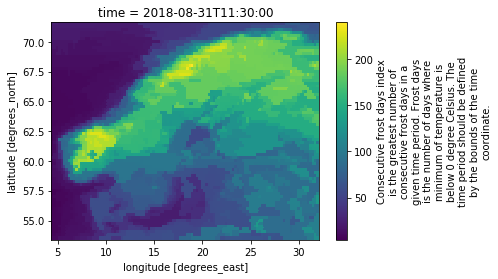

4 number_of_cfd_periods_with_more_than_5days_per_time_period


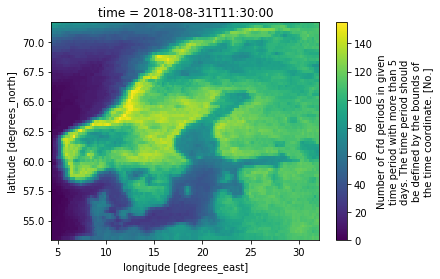

In [8]:
ds_cfd = xr.open_dataset("../era5/era5-nordics-ecacfd.nc")
for idx, v in enumerate(ds_cfd.variables):
    print(idx, v)
    if v not in dimensions:
        ds_cfd[v].plot()
        plt.show()

In [9]:
ds_cfd.time

<xarray.DataArray 'time' (time: 1)>
array(['2018-08-31T11:30:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-08-31T11:30:00
Attributes:
    standard_name:  time
    axis:           T

In [10]:
lon = df.lon.tolist()
lat = df.lat.tolist()

In [11]:
data = ds_cfd['inate.'].sel_points(longitude=lon, latitude=lat, method='nearest').values.ravel()

In [12]:
data

array([114., 114., 114., ..., 149., 149., 149.], dtype=float32)

In [13]:
df['cfd1'] = ds_cfd['inate.'].sel_points(longitude=lon, latitude=lat, method='nearest').values.ravel()

In [14]:
df['cfd2'] = ds_cfd['number_of_cfd_periods_with_more_than_5days_per_time_period'].sel_points(
    longitude=lon, latitude=lat, method='nearest').values.ravel()

In [15]:
df.head()

,plot_id,lon,lat,num_pine,vol_pine,num_spruce,vol_spruce,num_deciduous,vol_deciduous,number,volume,diameter,height,age,ratio_pine,ratio_spruce,ratio_deciduous,dominant_species,cfd1,cfd2
0,509711,23.760515,61.857391,629,239.3,79,27.6,118,11.3,825,278.2,22.5,19.6,40,0.86017,0.09921,0.04062,pine,114.0,111.0
1,509712,23.776417,61.857257,668,129.7,118,16.5,393,28.6,1179,174.9,17.8,15.7,35,0.74157,0.09434,0.16352,pine,114.0,111.0
2,509713,23.762006,61.854816,865,194.8,0,0.0,39,0.2,904,195.0,20.0,15.7,35,0.99897,0.00000,0.00103,pine,114.0,111.0
3,509714,23.761818,61.852331,2358,130.1,236,4.4,472,6.4,3065,140.9,12.4,12.0,30,0.92335,0.03123,0.04542,pine,114.0,111.0
4,509715,23.762492,61.850755,200,105.7,320,127.4,20,0.4,540,233.6,26.6,20.5,62,0.45248,0.54538,0.00171,none,114.0,111.0


Frost days

0 time
1 longitude
2 latitude
3 frost_days_index_per_time_period


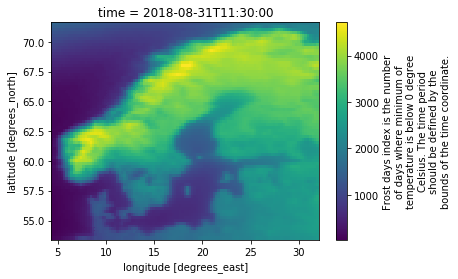

In [16]:
ds_fd = xr.open_dataset("../era5/era5-nordics-ecafd.nc")
for idx, v in enumerate(ds_fd.variables):
    print(idx, v)
    if v not in dimensions:
        ds_fd[v].plot()
        plt.show()

In [17]:
df['fd'] = ds_fd['frost_days_index_per_time_period'].sel_points(
    longitude=lon, latitude=lat, method='nearest').values.ravel()

0 time
1 longitude
2 latitude
3 oordinate.


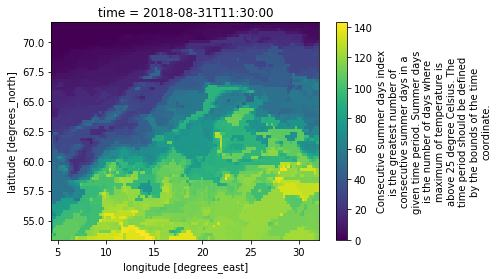

4 number_of_csu_periods_with_more_than_5days_per_time_period


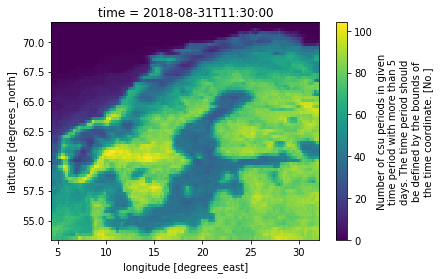

In [18]:
ds_csu = xr.open_dataset("../era5/era5-nordics-ecacsu.nc")
for idx, v in enumerate(ds_csu.variables):
    print(idx, v)
    if v not in dimensions:
        ds_csu[v].plot()
        plt.show()

In [19]:
df['csu1'] = ds_csu['oordinate.'].sel_points(
    longitude=lon, latitude=lat, method='nearest').values.ravel()

In [20]:
df['csu2'] = ds_csu['number_of_csu_periods_with_more_than_5days_per_time_period'].sel_points(
    longitude=lon, latitude=lat, method='nearest').values.ravel()

0 time
1 longitude
2 latitude
3 ice_days_index_per_time_period


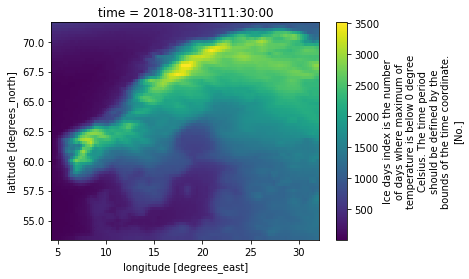

In [21]:
ds_id = xr.open_dataset("../era5/era5-nordics-ecaid.nc")
for idx, v in enumerate(ds_id.variables):
    print(idx, v)
    if v not in dimensions:
        ds_id[v].plot()
        plt.show()

In [22]:
df['id'] = ds_id['ice_days_index_per_time_period'].sel_points(
    longitude=lon, latitude=lat, method='nearest').values.ravel()

0 time
1 longitude
2 latitude
3 summer_days_index_per_time_period


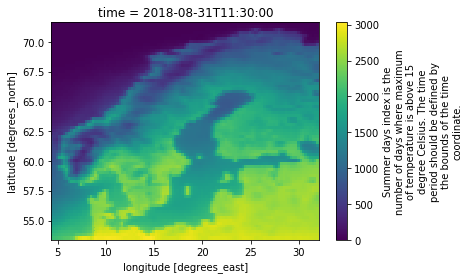

In [23]:
ds_su = xr.open_dataset("../era5/era5-nordics-ecasu.nc")
for idx, v in enumerate(ds_su.variables):
    print(idx, v)
    if v not in dimensions:
        ds_su[v].plot()
        plt.show()

In [24]:
df['su'] = ds_su['summer_days_index_per_time_period'].sel_points(
    longitude=lon, latitude=lat, method='nearest').values.ravel()

Drop rows with 'none' dominant_species

In [25]:
df.columns

Index(['plot_id', 'lon', 'lat', 'num_pine', 'vol_pine', 'num_spruce',
       'vol_spruce', 'num_deciduous', 'vol_deciduous', 'number', 'volume',
       'diameter', 'height', 'age', 'ratio_pine', 'ratio_spruce',
       'ratio_deciduous', 'dominant_species', 'cfd1', 'cfd2', 'fd', 'csu1',
       'csu2', 'id', 'su'],
      dtype='object')

In [26]:
df = df[df['dominant_species'] != 'none']
df = df[df['dominant_species'] != 'deciduous']

In [27]:
df.dominant_species.unique()

array(['pine', 'spruce'], dtype=object)

Train a classifier based on Random Forest

In [28]:
model = RandomForestClassifier(n_estimators=500, max_depth=6)

In [29]:
X = df[['cfd1', 'cfd2', 'fd', 'csu1', 'csu2', 'id', 'su']]

In [30]:
X.head()

,cfd1,cfd2,fd,csu1,csu2,id,su
0,114.0,111.0,2888.0,79.0,88.0,1428.0,2040.0
1,114.0,111.0,2888.0,79.0,88.0,1428.0,2040.0
2,114.0,111.0,2888.0,79.0,88.0,1428.0,2040.0
3,114.0,111.0,2888.0,79.0,88.0,1428.0,2040.0
5,114.0,111.0,2888.0,79.0,88.0,1428.0,2040.0


In [31]:
le = LabelEncoder()
le.fit(df.dominant_species.unique())
y = le.transform(df['dominant_species'])

In [32]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [34]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
y_pred = model.predict(X_test)

In [36]:
accuracy_score(y_pred, y_test)

0.7428281289667428

In [37]:
confusion_matrix(y_pred, y_test)

array([[2595,  714],
       [ 299,  331]])

Data is unbalanced. Let's undersample class 0

In [38]:
df_spruce = df[df['dominant_species'] == 'spruce']

In [39]:
df_pine = df[df['dominant_species'] == 'pine']

In [40]:
df_pine.lon.count()

9573

In [41]:
df_spruce.lon.count()

3557

In [42]:
df_pine = df_pine.sample(df_spruce.lon.count())

In [43]:
df = pd.concat([df_spruce, df_pine])

In [44]:
model = RandomForestClassifier(n_estimators=500, max_depth=6)

In [45]:
X = df[['cfd1', 'cfd2', 'fd', 'csu1', 'csu2', 'id', 'su']]

In [46]:
le = LabelEncoder()
le.fit(df.dominant_species.unique())
y = le.transform(df['dominant_species'])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [48]:
model = RandomForestClassifier(n_estimators=500, max_depth=6)

In [49]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
y_pred = model.predict(X_test)

In [51]:
accuracy_score(y_pred, y_test)

0.7002341920374707

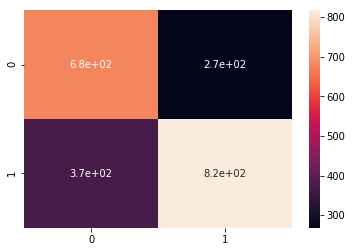

In [52]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)

In [53]:
confusion_matrix(y_pred, y_test)

array([[678, 268],
       [372, 817]])

In [54]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

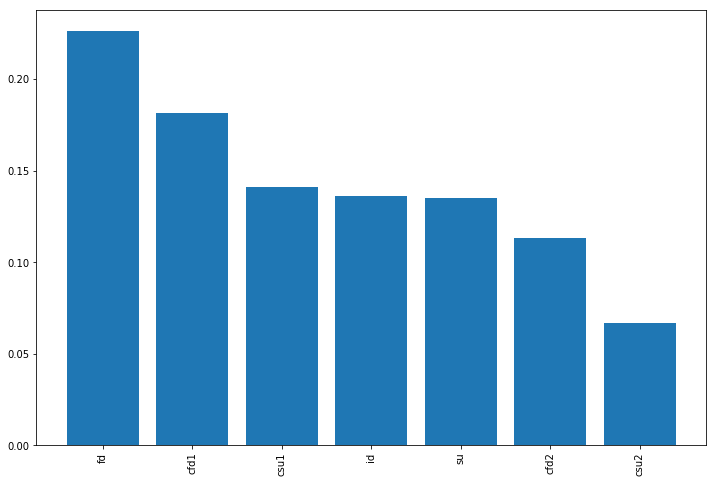

In [55]:
plt.figure(figsize=(12,8))
plt.bar(feature_importances.index, feature_importances["importance"])
plt.xticks(rotation=90)
plt.show()